In [58]:
import pandas as pd   
import numpy as np 
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
import cirpy # Convertir de cas a SMILES
from cirpy import Molecule # Para extraer caracteristicas de las moleculas
from rdkit.Chem import Draw

In [4]:
database = pd.read_csv(r'D:\PROYECTO IMAGENES\chemoinformatics_workshop-master\df_vapor_presion.csv', sep =';')
database.head(5)

,Nombre,cas,Vapor Pressure
0,alpha-fenchyl acetate,4057-31-2,0.117
1,allyl heptine carbonate,73157-43-4,0.013
2,fleabane oil (conyza canadensis),8007-27-0,1.450
3,2-methyl-3-isobutyl quinoxaline,15986-81-9,0.005
4,"1-(3aS,7aR)-3a,4,7,7a-tetrahydro-1H-inden-6-yl...",79044-50-1,0.007


In [8]:
list_smiles = []
for i in database.cas:
    smil = cirpy.resolve(i, 'smiles')
    list_smiles.append(smil)

In [ ]:
smiles_list = []
for i in dfPV['CAS']:
    risa = cirpy.resolve(i, 'smiles')
    smiles_list.append(risa)	


In [13]:
smiles = pd.DataFrame(list_smiles)
smiles = smiles.rename(columns={0:'smiles'})

smiles.head(2)

,smiles
0,CC(=O)OC1C(C)(C)C2CCC1(C)C2
1,CCCCCC#CC(=O)OCC=C


In [16]:
print('Registros smiles', len(smiles['smiles']))
print('Registros sin smiles',smiles.smiles.isnull().sum())
print('registros Totales:', len(smiles['smiles']) - smiles.smiles.isnull().sum() )

Registros smiles 1695
Registros sin smiles 272
registros Totales: 1423


In [40]:
df = pd.concat([database, smiles], axis =1)
df.head(4)

,Nombre,cas,Vapor Pressure,smiles
0,alpha-fenchyl acetate,4057-31-2,0.117,CC(=O)OC1C(C)(C)C2CCC1(C)C2
1,allyl heptine carbonate,73157-43-4,0.013,CCCCCC#CC(=O)OCC=C
2,fleabane oil (conyza canadensis),8007-27-0,1.450,None
3,2-methyl-3-isobutyl quinoxaline,15986-81-9,0.005,None


In [25]:
dfpv = df.dropna()


In [26]:
print('Cantidad de filas del dppv', len(dfpv)) 
dfpv.head(4)

Cantidad de filas del dppv 1423


,Nombre,cas,Vapor Pressure,smiles
0,alpha-fenchyl acetate,4057-31-2,0.117000,CC(=O)OC1C(C)(C)C2CCC1(C)C2
1,allyl heptine carbonate,73157-43-4,0.013000,CCCCCC#CC(=O)OCC=C
6,pseudo-isomethyl ionone,1117-41-5,0.000493,CC(C)=CCC\C(C)=C\C=C(/C)C(C)=O
7,2-methyl-3-pentyl quinoxaline,40790-46-3,0.001000,CCCCCc1nc2ccccc2nc1C


In [36]:
dfpv['mol'] = dfpv['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
dfpv.head(5)

C:\Users\juanmarin\Anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Nombre,cas,Vapor Pressure,smiles,mol
0,alpha-fenchyl acetate,4057-31-2,0.117000,CC(=O)OC1C(C)(C)C2CCC1(C)C2,<rdkit.Chem.rdchem.Mol object at 0x0000027EBDD...
1,allyl heptine carbonate,73157-43-4,0.013000,CCCCCC#CC(=O)OCC=C,<rdkit.Chem.rdchem.Mol object at 0x0000027EBDD...
6,pseudo-isomethyl ionone,1117-41-5,0.000493,CC(C)=CCC\C(C)=C\C=C(/C)C(C)=O,<rdkit.Chem.rdchem.Mol object at 0x0000027EBDD...
7,2-methyl-3-pentyl quinoxaline,40790-46-3,0.001000,CCCCCc1nc2ccccc2nc1C,<rdkit.Chem.rdchem.Mol object at 0x0000027EBDD...
8,ethyl 2-acetyl decanoate,24317-95-1,0.004000,CCCCCCCCC(C(C)=O)C(=O)OCC,<rdkit.Chem.rdchem.Mol object at 0x0000027EBDD...


In [87]:
dfpv = dfpv.reset_index()
dfpv = dfpv.drop(['index'], axis = 1)
dfpv = dfpv.rename(columns ={'Vapor Pressure':'PV'})

dfpv.head(4)

,Nombre,cas,PV,smiles,mol
0,alpha-fenchyl acetate,4057-31-2,0.117000,CC(=O)OC1C(C)(C)C2CCC1(C)C2,<rdkit.Chem.rdchem.Mol object at 0x0000027EBCD...
1,allyl heptine carbonate,73157-43-4,0.013000,CCCCCC#CC(=O)OCC=C,<rdkit.Chem.rdchem.Mol object at 0x0000027EBCD...
2,pseudo-isomethyl ionone,1117-41-5,0.000493,CC(C)=CCC\C(C)=C\C=C(/C)C(C)=O,<rdkit.Chem.rdchem.Mol object at 0x0000027EBCD...
3,2-methyl-3-pentyl quinoxaline,40790-46-3,0.001000,CCCCCc1nc2ccccc2nc1C,<rdkit.Chem.rdchem.Mol object at 0x0000027EBDD...


In [43]:
print('Registros sin smiles',dfpv.mol.isnull().sum())

Registros sin smiles 0


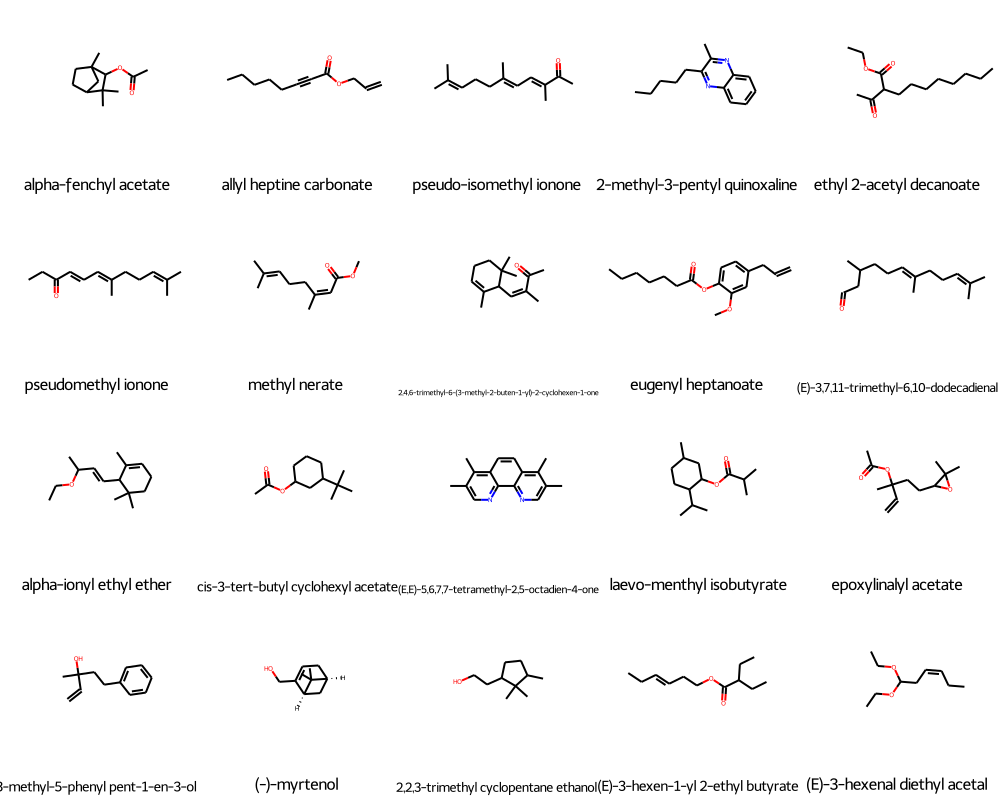

In [79]:

Draw.MolsToGridImage(dfpv['mol'][:20], molsPerRow=5, legends  = list(dfpv['Nombre'][:20].values) )


# Filtrar el DF con valores menores a presion de vapor de 20 

In [94]:
dfpv1 = dfpv[dfpv['PV'] <= 20]

In [102]:
print(len(dfpv))
print(len(dfpv1))
print(1423-1372)

1423
1372
51


In [103]:
dfpv1.describe()

,PV
count,1372.000000
mean,0.989529
std,2.763247
min,0.000000
25%,0.004000
50%,0.037000
75%,0.409000
max,20.000000


In [107]:
dfpv1.to_csv('dfpv1.csv',index=False,  sep=';')

In [ ]:
dfPV.to_csv('dfPresion_VaporCG.csv',  index=False, encoding='ISO-8859-1', sep=',')